In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
filepath = 'https://raw.githubusercontent.com/MrHexeberg/AI-medical-project/refs/heads/main/Tablet%20examination%20-%20Munka1.csv'

data = pd.read_csv(filepath, skiprows = 1)
data = data.drop('Measurement', axis = 1)

data.head()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,732,146,157,81.9,5.23,0.318
1,851,110,180,91.0,4.82,0.200
2,562,197,133,59.6,5.79,0.466
3,923,122,189,96.3,4.66,0.181
4,688,154,112,74.0,5.37,0.332


In [3]:
data.describe()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,711.440000,151.470000,151.390000,75.675000,5.296900,0.309340
std,149.542962,32.235076,31.828421,15.275096,0.473478,0.108533
min,504.000000,100.000000,100.000000,52.700000,4.500000,0.102000
25%,579.750000,118.750000,120.000000,64.375000,4.840000,0.190000
50%,676.500000,155.500000,148.000000,72.950000,5.395000,0.336000
75%,815.500000,182.250000,184.250000,88.825000,5.652500,0.410250
max,998.000000,198.000000,200.000000,100.000000,5.970000,0.466000


In [4]:
data.isnull().sum()

Press Force (kg)             0
Motor Speed (tablets/min)    0
Particle Size (μm)           0
Tablet Hardness (N)          0
Tablet Height (mm)           0
Tablet Friability (%)        0
dtype: int64

array([[<Axes: title={'center': 'Press Force (kg)'}>,
        <Axes: title={'center': 'Motor Speed (tablets/min)'}>],
       [<Axes: title={'center': 'Particle Size (μm)'}>, <Axes: >]],
      dtype=object)

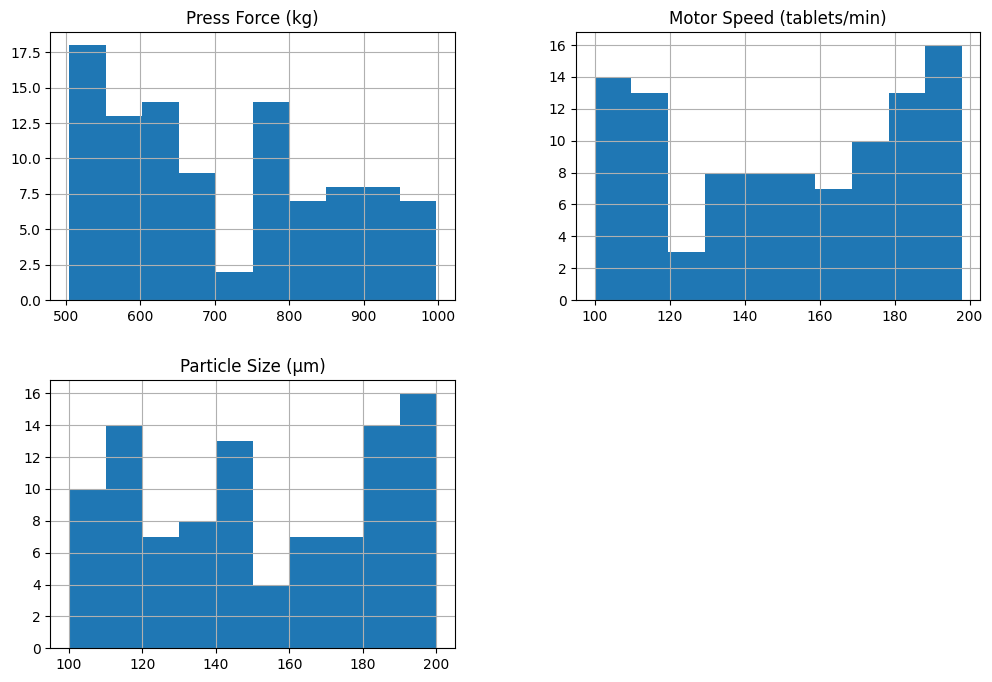

In [5]:
data[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']].hist(figsize=(12,8))

array([[<Axes: title={'center': 'Tablet Hardness (N)'}>,
        <Axes: title={'center': 'Tablet Height (mm)'}>],
       [<Axes: title={'center': 'Tablet Friability (%)'}>, <Axes: >]],
      dtype=object)

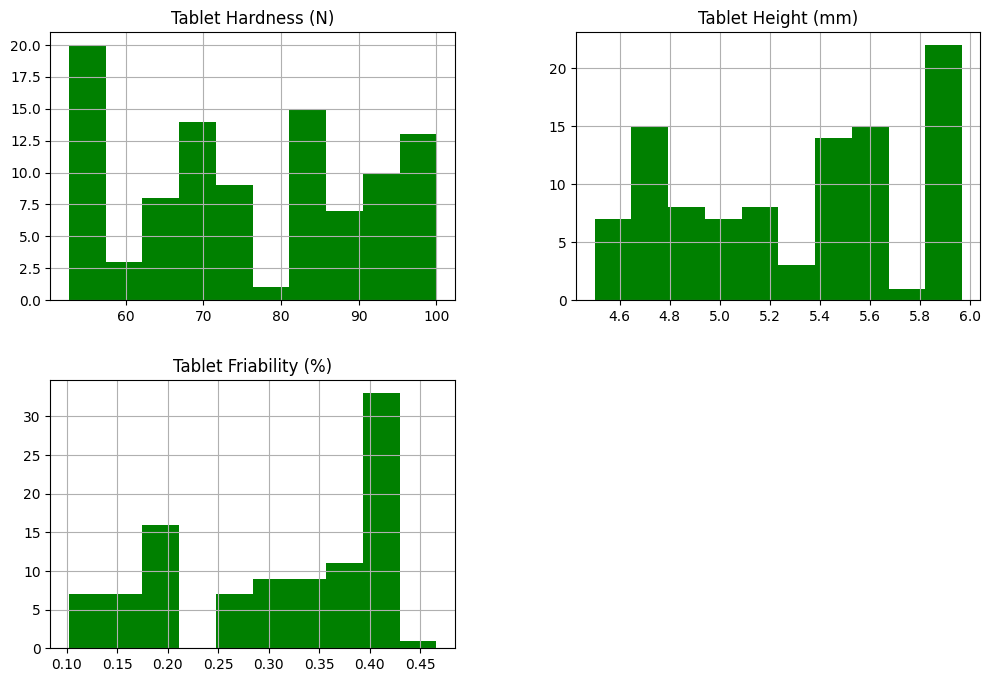

In [6]:
data[['Tablet Hardness (N)',	'Tablet Height (mm)',	'Tablet Friability (%)']].hist(figsize=(12, 8), color='g')

In [7]:
X = data[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = data[['Tablet Hardness (N)', 'Tablet Height (mm)', 'Tablet Friability (%)']]

In [8]:
# Splitting the dataset into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [10]:
# Multi Output Regressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [11]:
y_pred = model.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R2:', r2)
# print(y_pred)

RMSE: 0.4139128567562933
R2: 0.9941195162402968


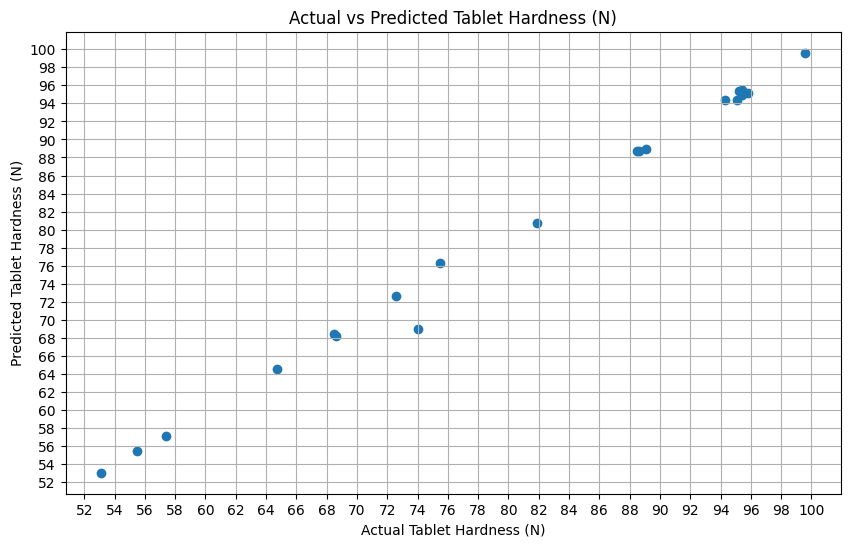

In [12]:
# Plotting Tablet Hardness (N)
sample = 'Tablet Hardness (N)'
test_sample = y_test[sample]
plt.figure(figsize=(10,6))
plt.scatter(test_sample, y_pred[:, 0])
# plt.plot([test_sample.min(), test_sample.max()], 
#          [test_sample.min(), test_sample.max()], 'r--', lw=2)

# Extension of the line ideal line
# plt.plot([test_sample.min()-2, test_sample.max()+2], 
#          [test_sample.min()-2, test_sample.max()+2], 'r--', lw=2)

plt.xlabel(f'Actual {sample}')
plt.ylabel(f'Predicted {sample}')
plt.title(f'Actual vs Predicted {sample}')


# Making custom grid for the plot
xy = np.arange(52, 102, 2)
plt.xticks(xy)
plt.yticks(xy)
plt.grid()

C:\Users\thebo\AppData\Local\Temp\ipykernel_14976\2054572445.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


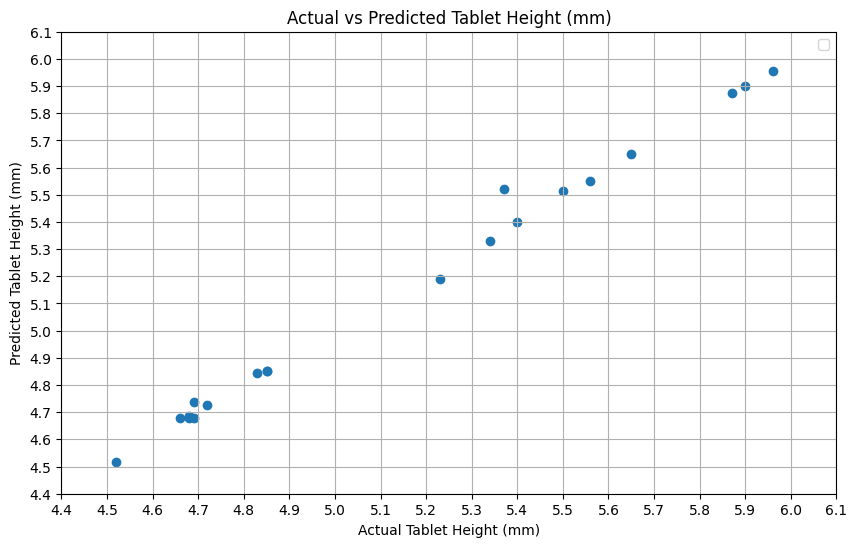

In [13]:
# Tablet height
sample = 'Tablet Height (mm)'
test_sample = y_test[sample]
plt.figure(figsize=(10,6))
plt.scatter(test_sample, y_pred[:, 1])
# plt.plot([test_sample.min(), test_sample.max()], 
#          [test_sample.min(), test_sample.max()], 'r--', lw=2, label='y_test minmax')
plt.xlabel(f'Actual {sample}')
plt.ylabel(f'Predicted {sample}')
plt.title(f'Actual vs Predicted {sample}')
plt.legend()

# Making custom grid for the plot
xy = np.arange(4.4, 6.2, 0.1)
plt.xticks(xy)
plt.yticks(xy)
plt.grid()

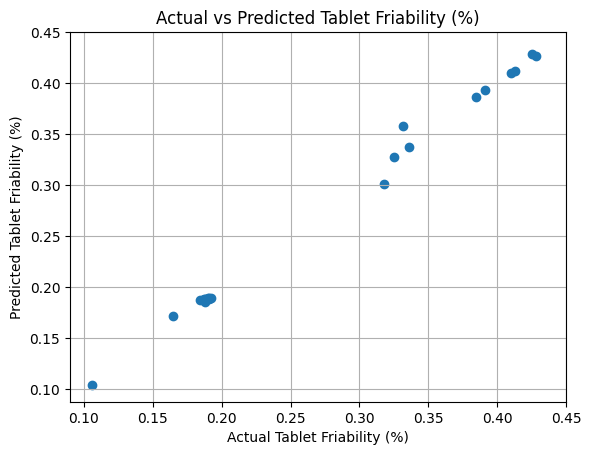

In [14]:
# Plotting Tablet Friability (%)
sample = 'Tablet Friability (%)'
test_sample = y_test[sample]
plt.scatter(test_sample, y_pred[:, 2])
# plt.plot([test_sample.min(), test_sample.max()], 
#          [test_sample.min(), test_sample.max()], 'r--', lw=2)
plt.xlabel(f'Actual {sample}')
plt.ylabel(f'Predicted {sample}')
plt.title(f'Actual vs Predicted {sample}')

# Making custom grid for the plot
xy = np.arange(0.1, 0.5, 0.05)
plt.xticks(xy)
plt.yticks(xy)
plt.grid()